Imports

In [31]:
import warnings

import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.exceptions import ConvergenceWarning
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
import copy
import numpy as np
import pandas as pd
import math

In [32]:
#columns:
#    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
#    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
#    "pH", "sulphates", "alcohol", "quality"

data = pd.read_csv (r'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')

y = pd.DataFrame(data, columns= ['quality']).values.ravel()
X = pd.DataFrame(data)
X = X.drop(columns='quality')

Prepare input

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Train model

In [34]:
mlp = MLPClassifier(hidden_layer_sizes=(11, 50, 50), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=True, random_state=10,
                    learning_rate_init=.14, early_stopping=False,
                    n_iter_no_change = 5, warm_start = True)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning,
                            module="sklearn")
    mlp.partial_fit(X_train, y_train, np.unique(y_train))

Iteration 1, loss = 1.34803647


In [35]:
train_scores = []
test_scores = []
predictions = []
biases = []
coefs = []

Output results

In [36]:
for i in range(40):
  mlp.partial_fit(X_train, y_train)
  train_scores.append(mlp.score(X_train, y_train))
  test_scores.append(mlp.score(X_test, y_test))
  coefs.append(copy.deepcopy(mlp.coefs_))
  biases.append(copy.deepcopy(mlp.intercepts_))
  predictions.append(mlp.predict(X_test))
  #print("Training set score: %f" % train_scores[-1])
  #print("Test set score: %f" % test_scores[-1])



#print(confusion_matrix(y_test,predictions))
#print(classification_report(y_test,predictions))

#plt.plot(mlp.validation_scores_)

#for coeff_map in mlp.coefs_:
#  print("-------------------")
#  for coeff in coeff_map:
#    print("---" + str(coeff))

Iteration 2, loss = 1.13276260
Iteration 3, loss = 1.05426415
Iteration 4, loss = 1.00919669
Iteration 5, loss = 0.97766089
Iteration 6, loss = 0.95813043
Iteration 7, loss = 0.94436083
Iteration 8, loss = 0.93433251
Iteration 9, loss = 0.92580490
Iteration 10, loss = 0.91765275
Iteration 11, loss = 0.90903523
Iteration 12, loss = 0.90078431
Iteration 13, loss = 0.89258557
Iteration 14, loss = 0.88432377
Iteration 15, loss = 0.87536546
Iteration 16, loss = 0.86790763
Iteration 17, loss = 0.85968146
Iteration 18, loss = 0.85136054
Iteration 19, loss = 0.84350076
Iteration 20, loss = 0.83431299
Iteration 21, loss = 0.82525138
Iteration 22, loss = 0.81610485
Iteration 23, loss = 0.80783539
Iteration 24, loss = 0.79845530
Iteration 25, loss = 0.78865543
Iteration 26, loss = 0.77907687
Iteration 27, loss = 0.76856556
Iteration 28, loss = 0.75954493
Iteration 29, loss = 0.75107954
Iteration 30, loss = 0.74273012
Iteration 31, loss = 0.73547915
Iteration 32, loss = 0.72817187
Iteration 33, lo

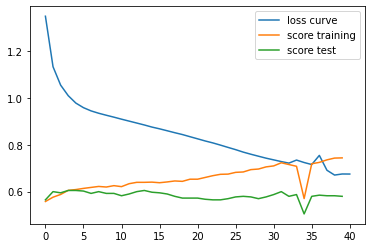

In [37]:
plt.plot(mlp.loss_curve_, label='loss curve')
plt.plot(train_scores, label='score training')
plt.plot(test_scores, label='score test')
plt.legend()

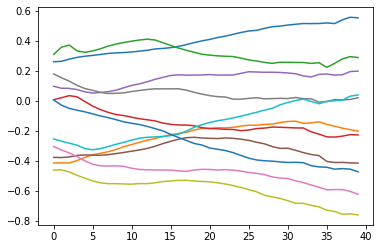

In [38]:
biases_0 = [biases[i][0] for i in range(len(biases))]
plt.plot(biases_0)

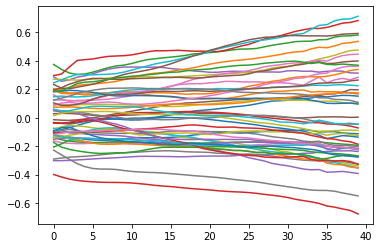

In [39]:
biases_1 = [biases[i][1] for i in range(len(biases))]
plt.plot(biases_1)

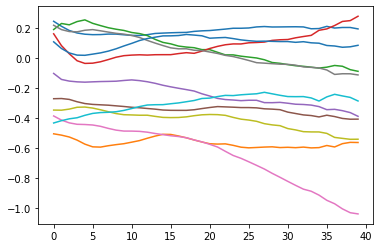

In [40]:
weights = [coefs[i][0][0] for i in range(len(coefs))]
plt.plot(weights)